# NMF with Water

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from NonnegMFPy import nmf

#from ihip.ihop import io as ihop_io
from ihop.hydrolight import loisel23
from oceancolor.iop import cross

In [6]:
%matplotlib ipympl

# Load

## LS23

In [22]:
X=4
Y=0
ds = loisel23.load_ds(X, Y)

In [23]:
spec = ds['a'].data
wave = ds.Lambda.data

## Water

In [24]:
a_w = cross.a_water(wave, data='IOCCG')

In [25]:
a_w.size, wave.size

(81, 81)

# Check one

In [26]:
idx = 100

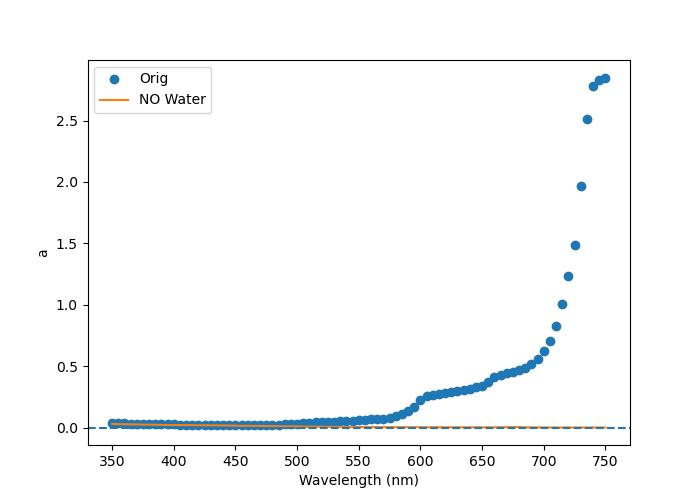

In [27]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()

ax.plot(wave,spec[idx, :], 'o', label=r'Orig')
ax.plot(wave,spec[idx, :]-a_w, label=r'NO Water')
#ax.plot(wave,recon, label=r'Recon')
#ax.plot(wave,M[2], label=r'$\xi_3$')
ax.axhline(0., ls='--')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('a')
ax.legend()
#
plt.show()

# Subtract it off

In [28]:
spec.shape

(3320, 81)

In [29]:
spec_nw = spec - np.outer(np.ones(3320), a_w)

## Keep to 0 or more

In [30]:
spec_nw.min()

-9.536743172944284e-08

In [31]:
spec_nw = np.maximum(spec_nw, 0.)

# NMF

In [62]:
g = nmf.NMF(spec_nw.T, n_components=2)

In [63]:
chi2, time_used = g.SolveNMF() 

Current Chi2=0.0002, Previous Chi2=0.3561, Change=99.9470% @ niters=0
Current Chi2=0.0000, Previous Chi2=0.0000, Change=7.5640% @ niters=20
Current Chi2=0.0000, Previous Chi2=0.0000, Change=4.4417% @ niters=40
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.3311% @ niters=60
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0263% @ niters=80
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0057% @ niters=100
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0023% @ niters=120
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0012% @ niters=140
Took 0.014 minutes to reach current solution.


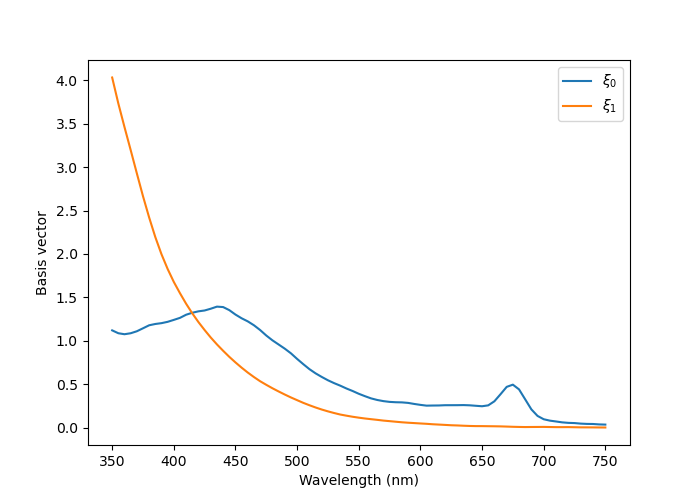

In [64]:
M = g.W.T
wave = ds.Lambda.data
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(M.shape[0]):
    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()

# Variance

In [41]:
#recon = np.dot(g.H[:,0], g.W.T)
recon = np.dot(g.H.T, g.W.T)
recon.shape

(3320, 81)

In [43]:
dev = recon-spec_nw

In [44]:
dev.shape

(3320, 81)

In [55]:
rms = np.std(dev, axis=1)
#gd = spec_nw > 0.
frac_dev = np.mean(np.abs(dev/spec_nw), axis=1)
rms.shape, frac_dev.shape

/tmp/ipykernel_7917/2481956236.py:3: RuntimeWarning: divide by zero encountered in divide
  frac_dev = np.mean(np.abs(dev/spec_nw), axis=1)


((3320,), (3320,))

## RMS

In [49]:
np.mean(rms), np.median(rms), np.max(rms)

(0.0006239909463445064, 0.0003719218070746749, 0.015672307545667803)

## Maximum deviates

In [53]:
np.mean(frac_dev)

inf